<a href="https://colab.research.google.com/github/Shyam-S-Mishra/Shyam-S-Mishra-Supervised_ML_Capstone_Project_Regression/blob/main/Shyam_Shubham_Mishra_Supervised_ML_Capstone_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
# Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

>
# Let's Begin !

>
## Know Your Data

>
### Importing the libraries

In [27]:
# Importing Libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

>
### Dataset Loading

In [28]:
# Mounting Drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Importing Dataset 

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression_Capstone Project_Supervised ML/data_YesBank_StockPrices.csv')

>
### Dataset First View

In [30]:
# Dataset First Look

dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


>
### Dataset Rows & Column Count

In [31]:
# Dataset Rows & Columns

dataset.shape

(185, 5)

>
### Dataset Information

In [32]:
# Datset Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


>
### Duplicate Values

In [33]:
# Counting duplicate values in the dataset 

len(dataset[dataset.duplicated()])

0

>
### Null Values

In [34]:
# Finding null values in the dataset

print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


Here, it is precise that our data has no duplicate or null values.

>
### About Dataset

The above given dataset has stock prices of Yes Bank, which includes open, high, low and closing prices of the stock for various dates.

The given dataset has 185 rows and 5 columns. There are no missing values and duplicate values in the dataset.

The goal is to build a machine learning model that predicts the stock’s closing price of the month.

>
## Understanding the Variables

In [35]:
# Dataset Columns

dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [36]:
# Dataset Describe

dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


In [37]:
# Checking unique values for each variable

dataset.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

>
## Feature and Target Details

>
### Feature Details

* Date - Date of Record
* Open - Opening Price
* High - Highest Price in the day
* Low - Lowest Price in the day

>
### Target Details

* Close - Closing Price

>
## Exploratory Data Analysis

>
### Univariate Analysis

In [38]:
# Changing the data type of date column i.e string to datetime

from datetime import datetime
dataset['Date'] = dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

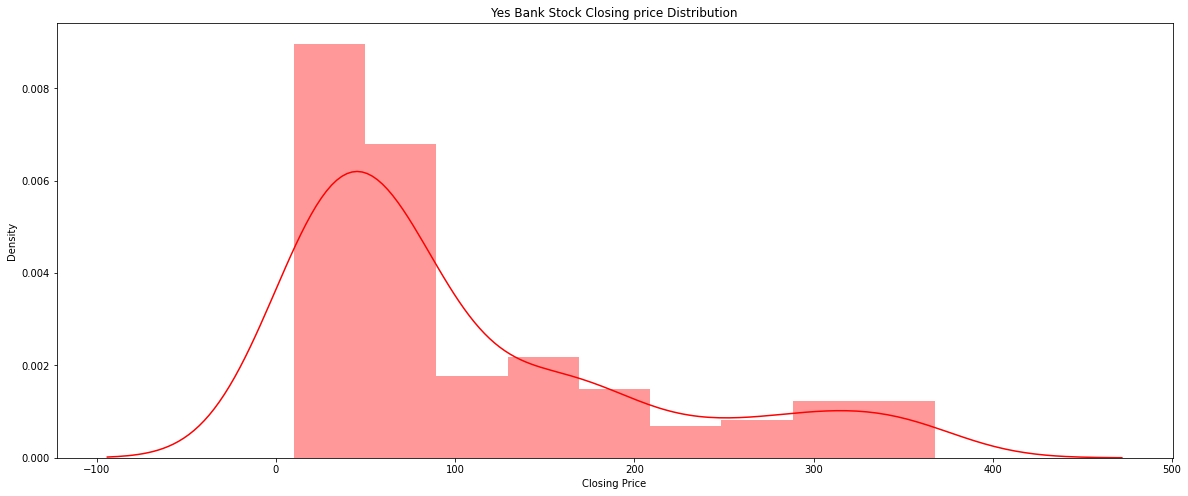

In [53]:
# Dependent variable = 'Close'

plt.figure(figsize=(20,8))
sns.distplot(dataset['Close'],color="red")
plt.title('Yes Bank Stock Closing price Distribution')
plt.xlabel('Closing Price')
plt.show()

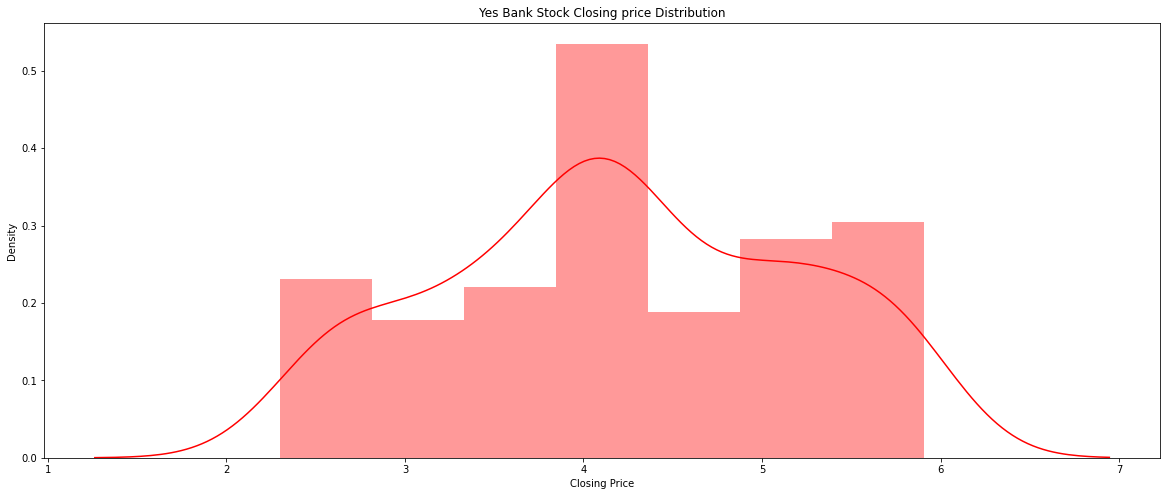

In [54]:
# Here, it is precise that the variable is right skewed. Hence we'll use log tranformation make the distribution more Gaussian looking.

plt.figure(figsize=(20,8))
sns.distplot(np.log(dataset['Close']),color="red")
plt.title('Yes Bank Stock Closing price Distribution')
plt.xlabel('Closing Price')
plt.show()

Exploring the independent variables of the dataset

In [44]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

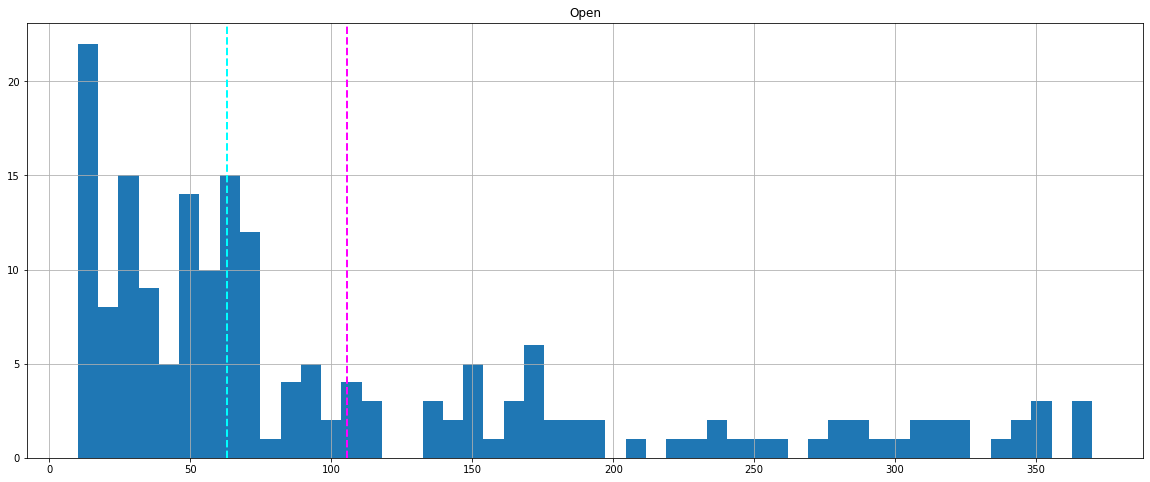

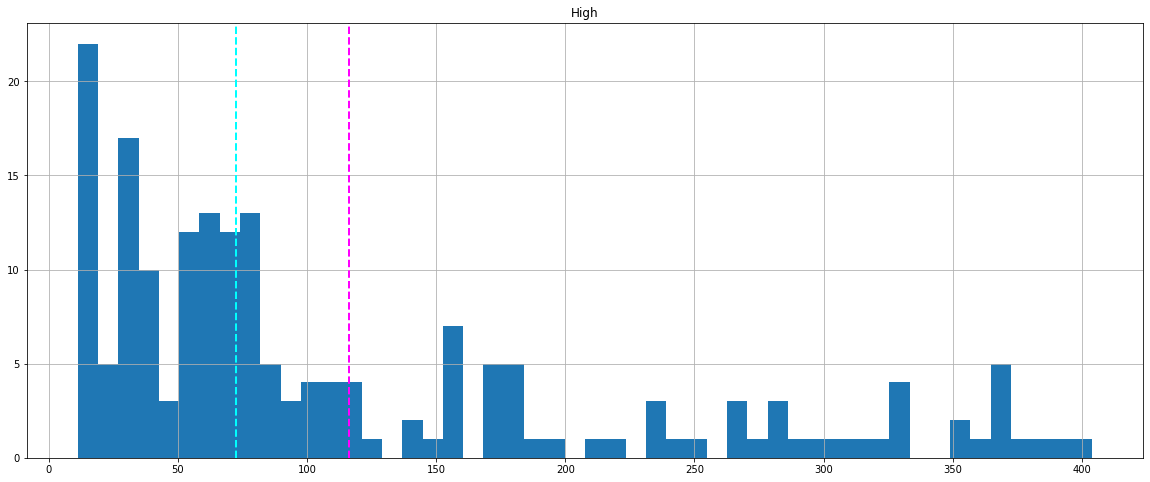

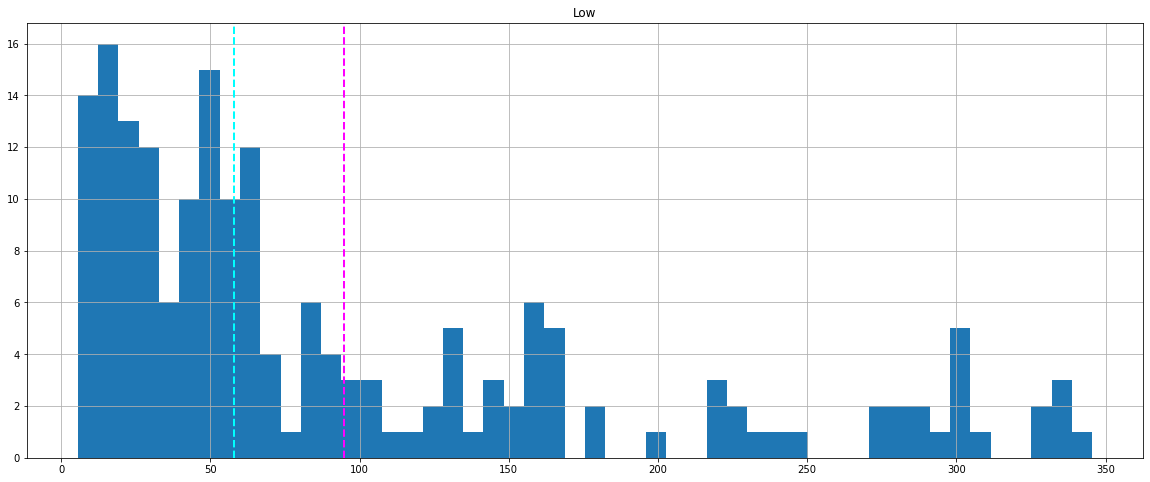

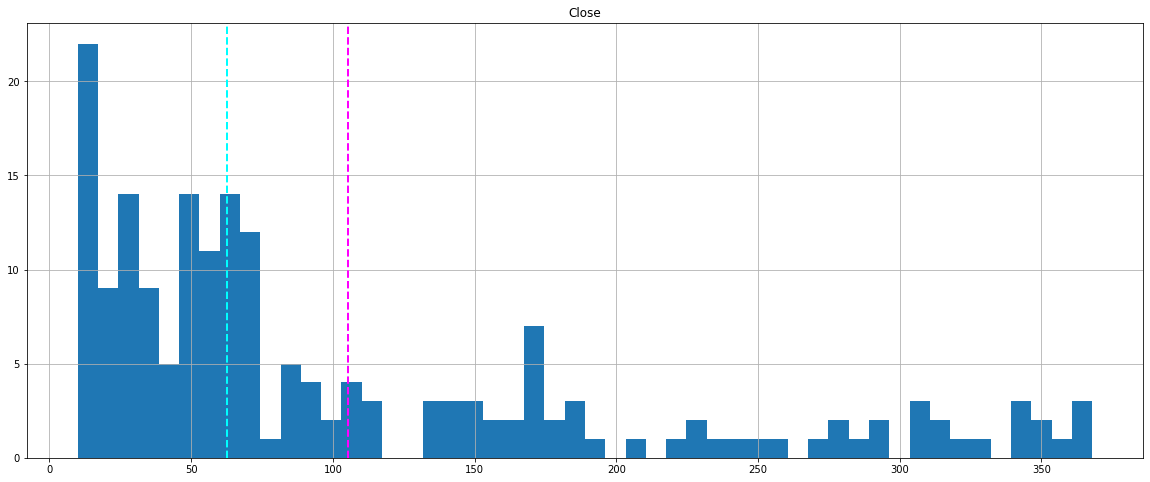

In [55]:
# Creating a plot for each independent variable (except 'Date')

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(20,8))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

>
### Bivariate Analysis

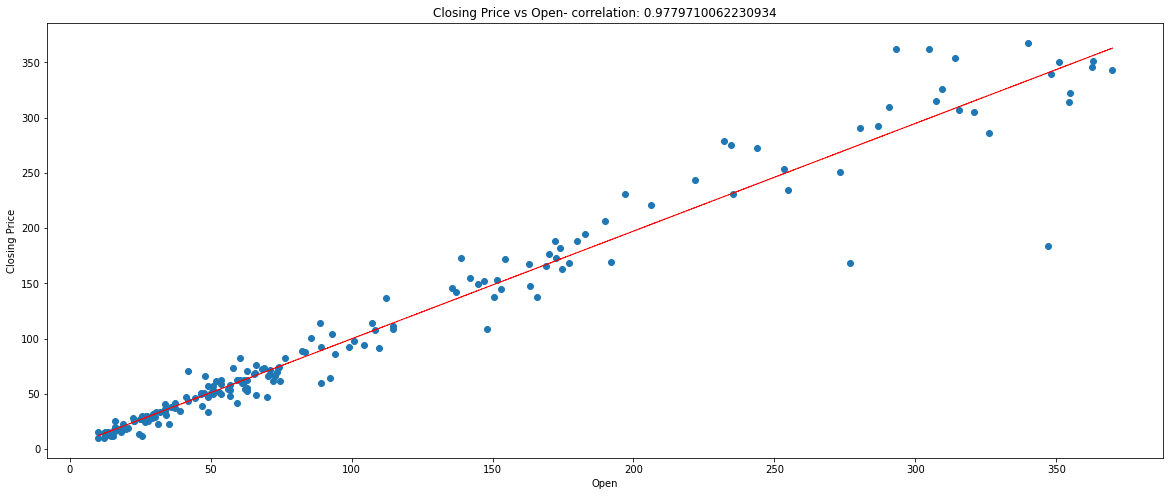

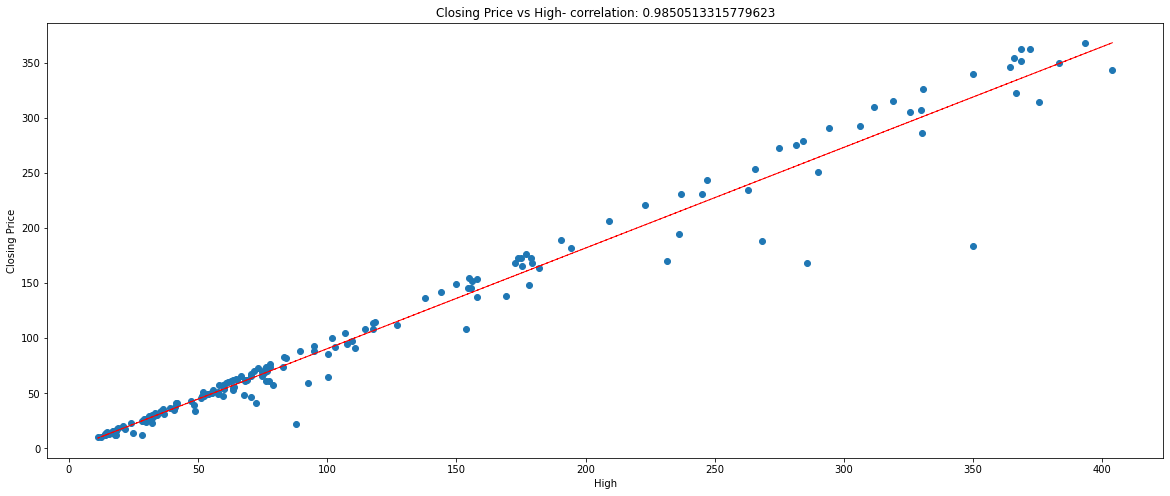

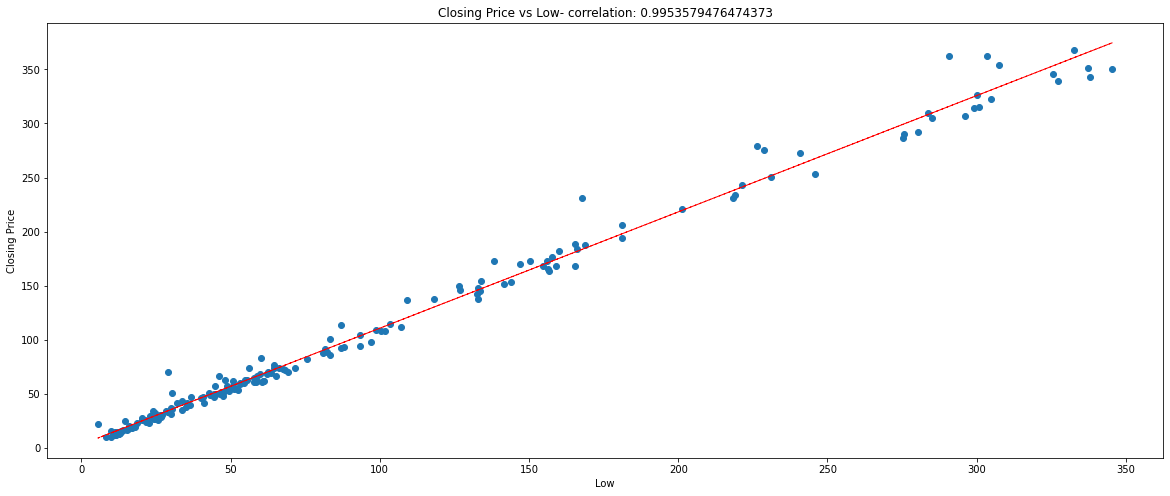

In [56]:
# Creating scatter plot to visualise the corelation between dependent variable and each of the independent variable

for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(20,8))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Closing Price')
    ax.set_title('Closing Price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

>
### Multivariate Analysis

<Axes: >

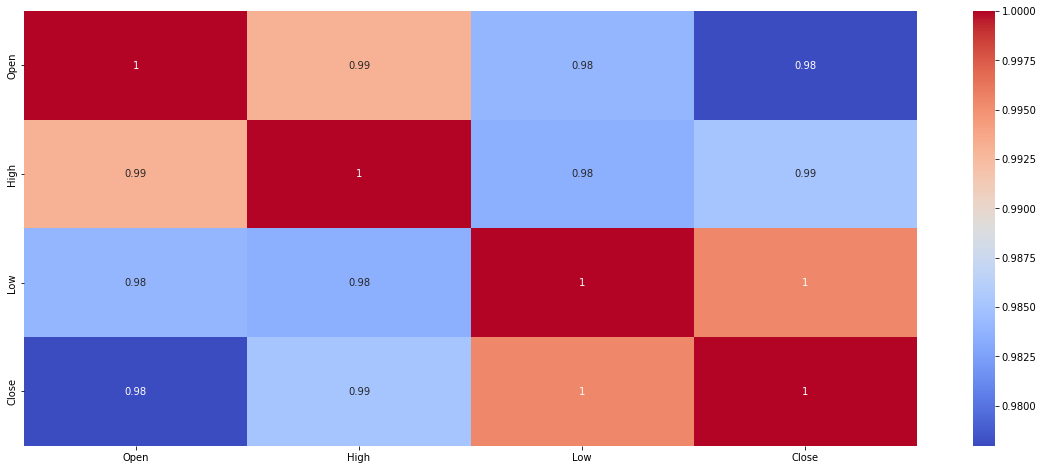

In [57]:
# Creating a heat map to visualise the corelation betwwen all the features

plt.figure(figsize=(20,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')